In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

In [92]:
sal = pd.read_csv('Position_Salaries.csv')
sal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [112]:
x = sal['Salary'].values.tolist()
y = sal['Level'].values.tolist()

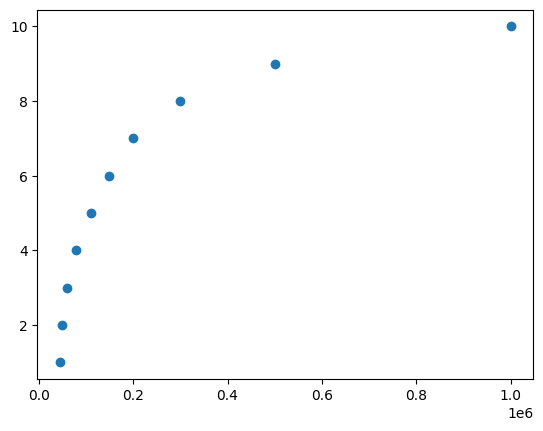

In [113]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

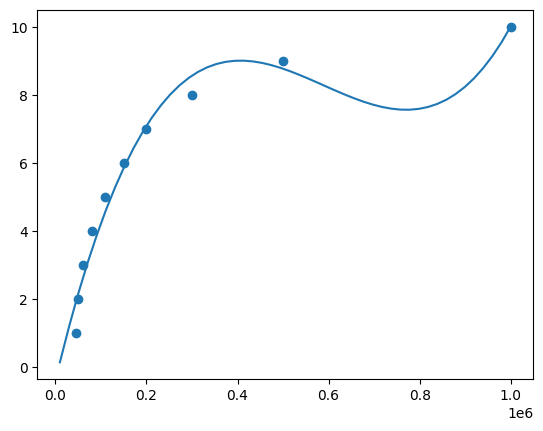

In [138]:
model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(10000, 1000000, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()


In [115]:
print(model)

           3             2
5.985e-17 x - 1.056e-10 x + 5.619e-05 x - 0.4008


In [119]:
linreg=LinearRegression()

In [121]:
x1 = np.array(x)
y1 = np.array(y)
linreg.fit(x1.reshape(-1,1), y1.reshape(-1,1))

LinearRegression()

In [123]:
y_pred = linreg.predict(x1.reshape(-1,1))

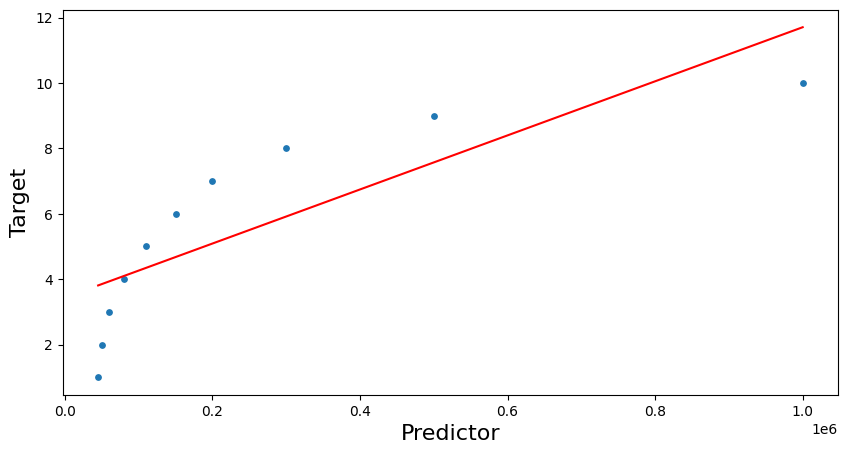

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred, color='red')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [125]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1.6523951785689273


In [142]:
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x1.reshape(-1,1), y1.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('modal', LinearRegression())])

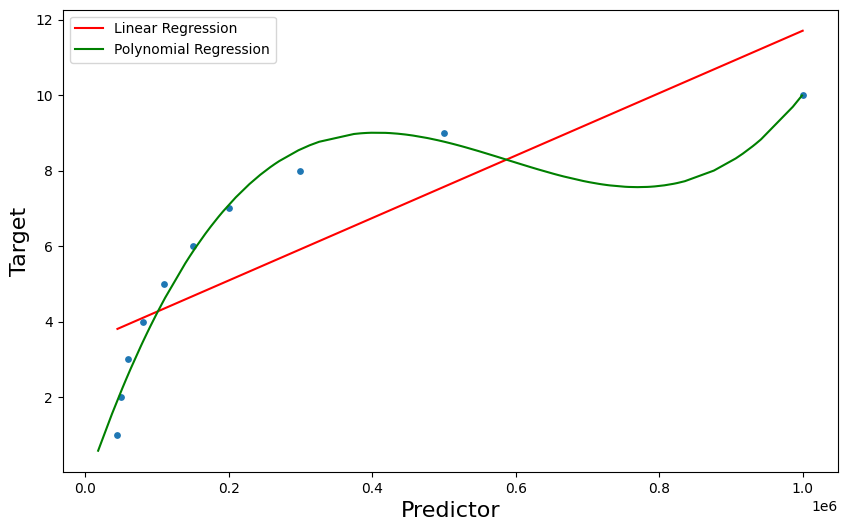

In [143]:
x_new = np.random.randint(10000,1000000,(100, 1))

poly_pred=pipe.predict(x_new.reshape(-1,1))
sorted_zip = sorted(zip(x_new,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

plt.figure(figsize=(10,6))
plt.scatter(x1,y1,s=15)
plt.plot(x1,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()


In [151]:
poly_pred=pipe.predict(x1.reshape(-1,1))
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 0.43677934114287814
